<a href="https://colab.research.google.com/github/bhadreshpsavani/LearningJax/blob/main/Notebooks/TrainSimpleMLPwithJAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Reression with JAX

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp

## Step1. Get Sample Data

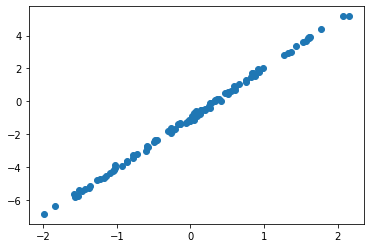

In [ ]:
xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys)

## Step2. Define Model

In [ ]:
def model(theta, x):
  """
  our model will be simple linear equation
  like y = mx+c
  """
  w, b = theta
  return w*x + b

## Step3. Define Loss function

In [ ]:
def loss_fn(theta, x, y):
  """
  J(x,y;θ)=(y^−y)2
  """
  # make prediction
  prediction = model(theta, x)
  return jnp.mean((prediction-y)**2) # calculate loss

## Step4. Define Optimizer Function

In [ ]:
def update(theta, x, y, lr=0.1):
  """
  We will use gradient decent to update weights
  for that first we will find gradient of loss function
  and use that for updating weights
  """
  return theta - lr * jax.grad(loss_fn)(theta, x, y)

## Step5. Train Model

In [ ]:
# initialize single weight and bias variable with one
theta = jnp.array([1.,1.])

In [ ]:
# train model and update weights
for _ in range(1000):
  theta = update(theta, xs, ys)

w: 3.00, b: -1.01


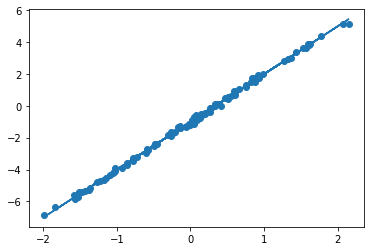

In [ ]:
plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))
w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")